# 🚢 Árboles de Decisión aplicados al dataset del Titanic

En este cuaderno utilizaremos **árboles de decisión** para analizar el famoso dataset del **Titanic**, uno de los más usados en ciencia de datos para introducir conceptos de clasificación supervisada.  

Los árboles de decisión son modelos **no paramétricos**, lo que significa que no asumen una forma funcional fija entre variables. En lugar de eso, **dividen los datos en ramas** según reglas de decisión, hasta llegar a predicciones finales en las hojas.

---

## 📌 Objetivos principales
- Aplicar **DecisionTreeClassifier** al dataset del Titanic.  
- Comprender cómo los árboles realizan la clasificación basándose en atributos como edad, sexo, clase, etc.  
- Visualizar el árbol entrenado para interpretar las reglas de decisión.  
- Evaluar el desempeño del modelo con métricas de clasificación.  
- Comparar los resultados con otras técnicas de machine learning.

---

## 🛠️ Herramientas utilizadas
- **Python 3**  
- **pandas / numpy** → manejo de datos.  
- **matplotlib / seaborn** → visualización.  
- **scikit-learn** → construcción del árbol y métricas de evaluación.  

---

## 🚀 Flujo de trabajo en el notebook
1. **Carga y exploración** del dataset Titanic.  
2. **Preprocesamiento**: selección de variables, tratamiento de nulos, codificación de categorías.  
3. **Entrenamiento del árbol** de decisión para predecir la supervivencia (`Survived`).  
4. **Visualización del árbol** y análisis de las reglas aprendidas.  
5. **Evaluación del modelo** mediante accuracy, precision, recall, y matriz de confusión.  
6. **Discusión** sobre ventajas y limitaciones de los árboles en problemas reales.  

---

## 📚 Qué aprenderás
- Cómo funcionan los **modelos no paramétricos** de clasificación.  
- La lógica de partición de un **árbol de decisión**.  
- El impacto de hiperparámetros como `max_depth` y `min_samples_leaf` en el desempeño.  
- Cómo interpretar gráficamente un árbol para obtener insights de negocio (ejemplo: mayor probabilidad de supervivencia en mujeres y niños de primera clase).  


In [35]:
"""
@author: anahí
pip install seaborn
https://scikit-learn.org/stable/modules/tree.html#
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://medium.com/@natalia.benitez/%C3%A1rboles-de-decisi%C3%B3n-usando-python-2b0598698944
https://towardsdatascience.com/master-machine-learning-decision-trees-from-scratch-with-python-de75b0494bcd
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')


In [36]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [37]:
#%%  CARGAMOS DATASET Y LO CONOCEMOS UN POCO
titanic = sns.load_dataset("titanic")

print(type(titanic))
print(titanic.shape)
print(titanic.columns)
titanic.head()


<class 'pandas.core.frame.DataFrame'>
(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [41]:
titanic.isnull().sum().sum()

869

In [42]:
print(f'Hay datos ausentes? {titanic.isnull().any().any()}')
titanic.info()

Hay datos ausentes? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [43]:
titanic['pclass'].unique()

array([3, 1, 2])

In [44]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

survived
0    549
1    342
dtype: int64


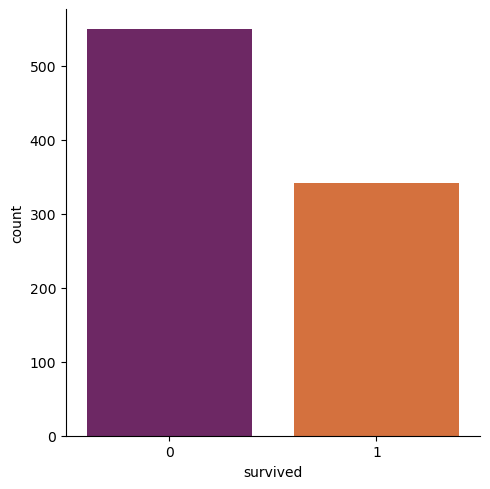

In [45]:
print(titanic.groupby('survived').size())
sns.catplot(data=titanic, x='survived', kind = "count", palette='inferno')
# 1.5 no, 1 si - »'survived' hay desbalance

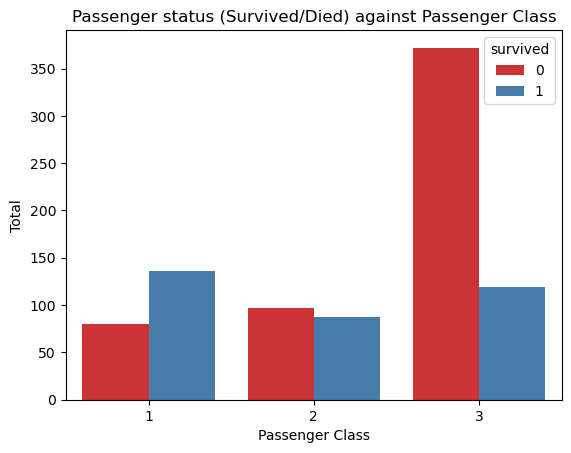

In [46]:
# https://www.kaggle.com/code/thulani96/titanic-dataset-analysis-with-seaborn

ax = sns.countplot(x = 'pclass', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


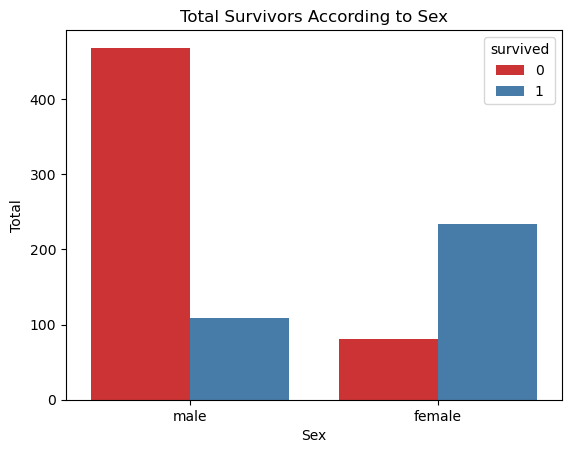

In [47]:
print(pd.crosstab(titanic["sex"],titanic.survived))
ax = sns.countplot(x = 'sex', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

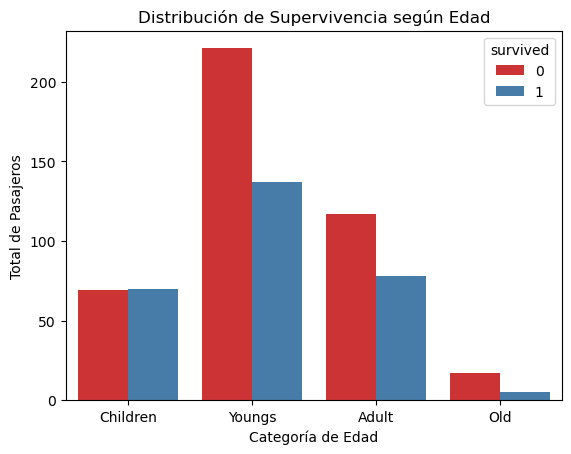

In [48]:
# 👶👦👩👴 Agrupamos las edades en categorías y analizamos la supervivencia

# 📌 Paso 1: Definir intervalos de edad
# - (0,18]   → Children
# - (18,35]  → Youngs
# - (35,60]  → Adult
# - (60,120] → Old
interval = (0, 18, 35, 60, 120)
categories = ['Children', 'Youngs', 'Adult', 'Old']

# 📌 Paso 2: Crear nueva columna categórica 'age_cats'
# pd.cut asigna cada valor de 'age' a un intervalo definido
titanic['age_cats'] = pd.cut(titanic.age, interval, labels=categories)

# 📌 Paso 3: Graficar distribución de supervivencia por categoría de edad
ax = sns.countplot(
    x='age_cats', 
    data=titanic, 
    hue='survived',       # colores según si sobrevivió o no
    palette='Set1'        # paleta de colores
)

# 📌 Paso 4: Ajustes de etiquetas y título del gráfico
ax.set(
    xlabel='Categoría de Edad', 
    ylabel='Total de Pasajeros',
    title="Distribución de Supervivencia según Edad"
)

# 📌 Paso 5: Mostrar gráfico
plt.show()


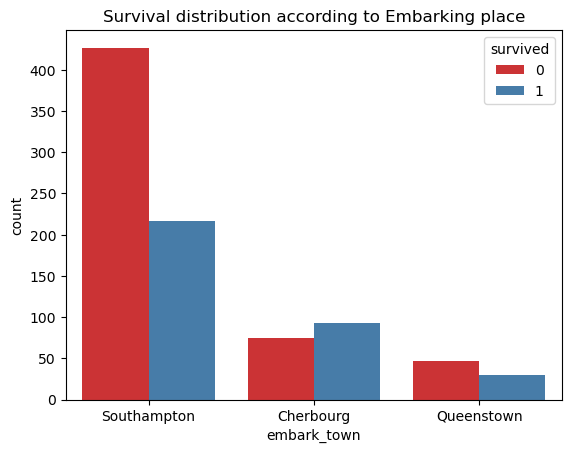

In [49]:
ax = sns.countplot(x = 'embark_town', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [50]:
print(pd.crosstab(titanic['embarked'], titanic.survived))

survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217


In [51]:
#%%  PREPARAMOS LOS DATOS PARA EL MODELO
# asignamos el valor medio a los faltantes de la columna 'age'
titanic['age'] = titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))
titanic.info()
# quedaron casi todas las columnas sin NaN, excepto 'deck' que sólo tiene 203 valores no nulos
# esa columna la eliminaremos pues no tiene suficientes datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cats     714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [52]:
titanic['age'].unique()
#print(len(titanic['age'].unique()))

array([22.        , 38.        , 26.        , 35.        , 26.50758893,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 30.74070707,
       31.        , 21.75      , 34.        , 15.        , 28.        ,
        8.        , 19.        , 40.        , 34.61176471, 66.        ,
       42.        , 21.        , 18.        ,  3.        ,  7.        ,
       49.        , 29.        , 65.        , 41.28138614, 28.5       ,
        5.        , 11.        , 45.        , 17.        , 32.        ,
       16.        , 25.        ,  0.83      , 30.        , 33.        ,
       23.        , 24.        , 46.        , 59.        , 71.        ,
       37.        , 47.        , 14.5       , 70.5       , 32.5       ,
       12.        ,  9.        , 36.5       , 51.        , 55.5       ,
       40.5       , 44.        ,  1.        , 61.        , 56.        ,
       50.        , 36.        , 45.5       , 20.5       , 62.  

In [53]:
edad=titanic[['age','sex','adult_male'] ]
edad

,age,sex,adult_male
0,22.00,male,True
1,38.00,female,False
2,26.00,female,False
3,35.00,female,False
4,35.00,male,True
...,...,...,...
886,27.00,male,True
887,19.00,female,False
888,21.75,female,False
889,26.00,male,True


In [54]:
# elegimos las características predictoras, eliminamos las redundantes x estar duplicadas
X_not = titanic.drop(['deck', 'alive', 'who', 'embarked', 'pclass','age_cats'], axis=1)
X_not.head()


,survived,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,True,Southampton,True


In [55]:
# aplicamos el método de Pandas equivalente a OneHotEncoder sobre class,
# recordar que sólo opera sobre columnas con type= 'object' o 'category'
# pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False,
#                    columns=None, sparse=False, drop_first=False, dtype=None)
X=pd.get_dummies(X_not, prefix_sep='-', dummy_na=False, columns=['class', 'embark_town'])

# aplicamos el Encoder sobre las variables que son 'etiquetables'
le = LabelEncoder()
columns=['sex', 'adult_male', 'alone']
for col in columns:
    X[col] = le.fit_transform(X[col])

print(X.shape)
X.head()

(891, 14)


,survived,sex,age,sibsp,parch,fare,adult_male,alone,class-First,class-Second,class-Third,embark_town-Cherbourg,embark_town-Queenstown,embark_town-Southampton
0,0,1,22.0,1,0,7.2500,1,0,False,False,True,False,False,True
1,1,0,38.0,1,0,71.2833,0,0,True,False,False,True,False,False
2,1,0,26.0,0,0,7.9250,0,1,False,False,True,False,False,True
3,1,0,35.0,1,0,53.1000,0,0,True,False,False,False,False,True
4,0,1,35.0,0,0,8.0500,1,1,False,False,True,False,False,True


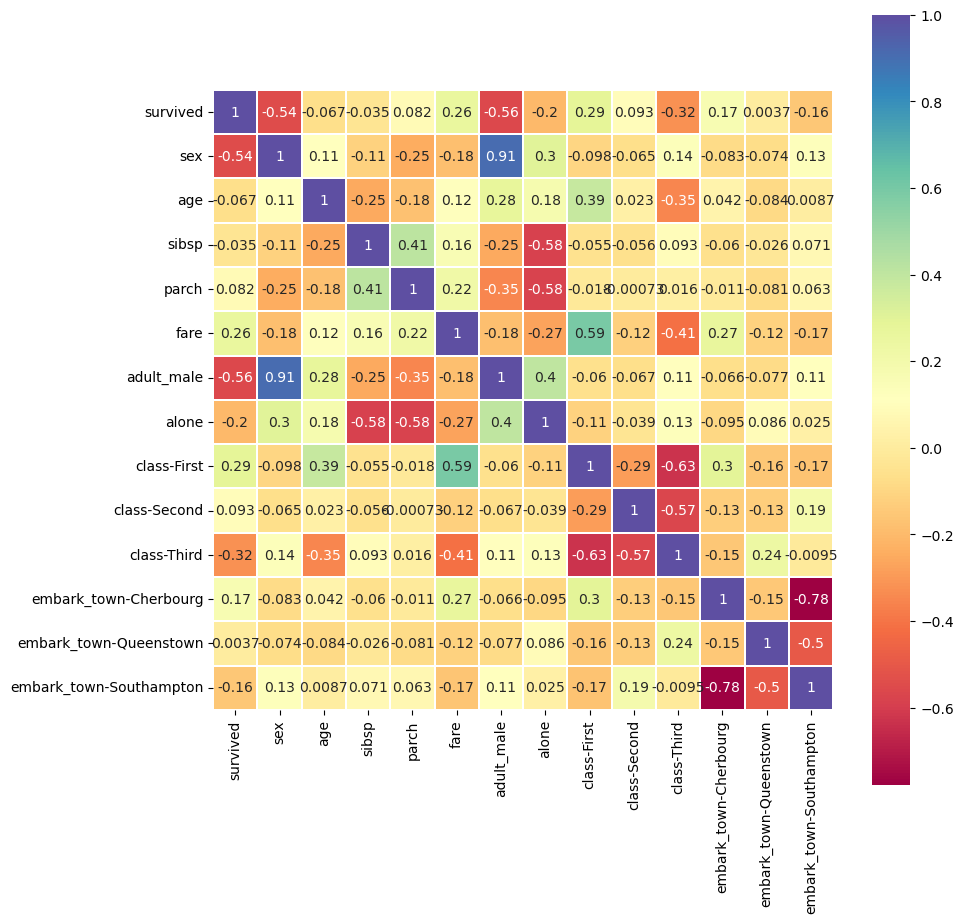

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),linewidths=0.1, square=True,  linecolor='white', annot=True, cmap='Spectral')
plt.show()
plt.close()

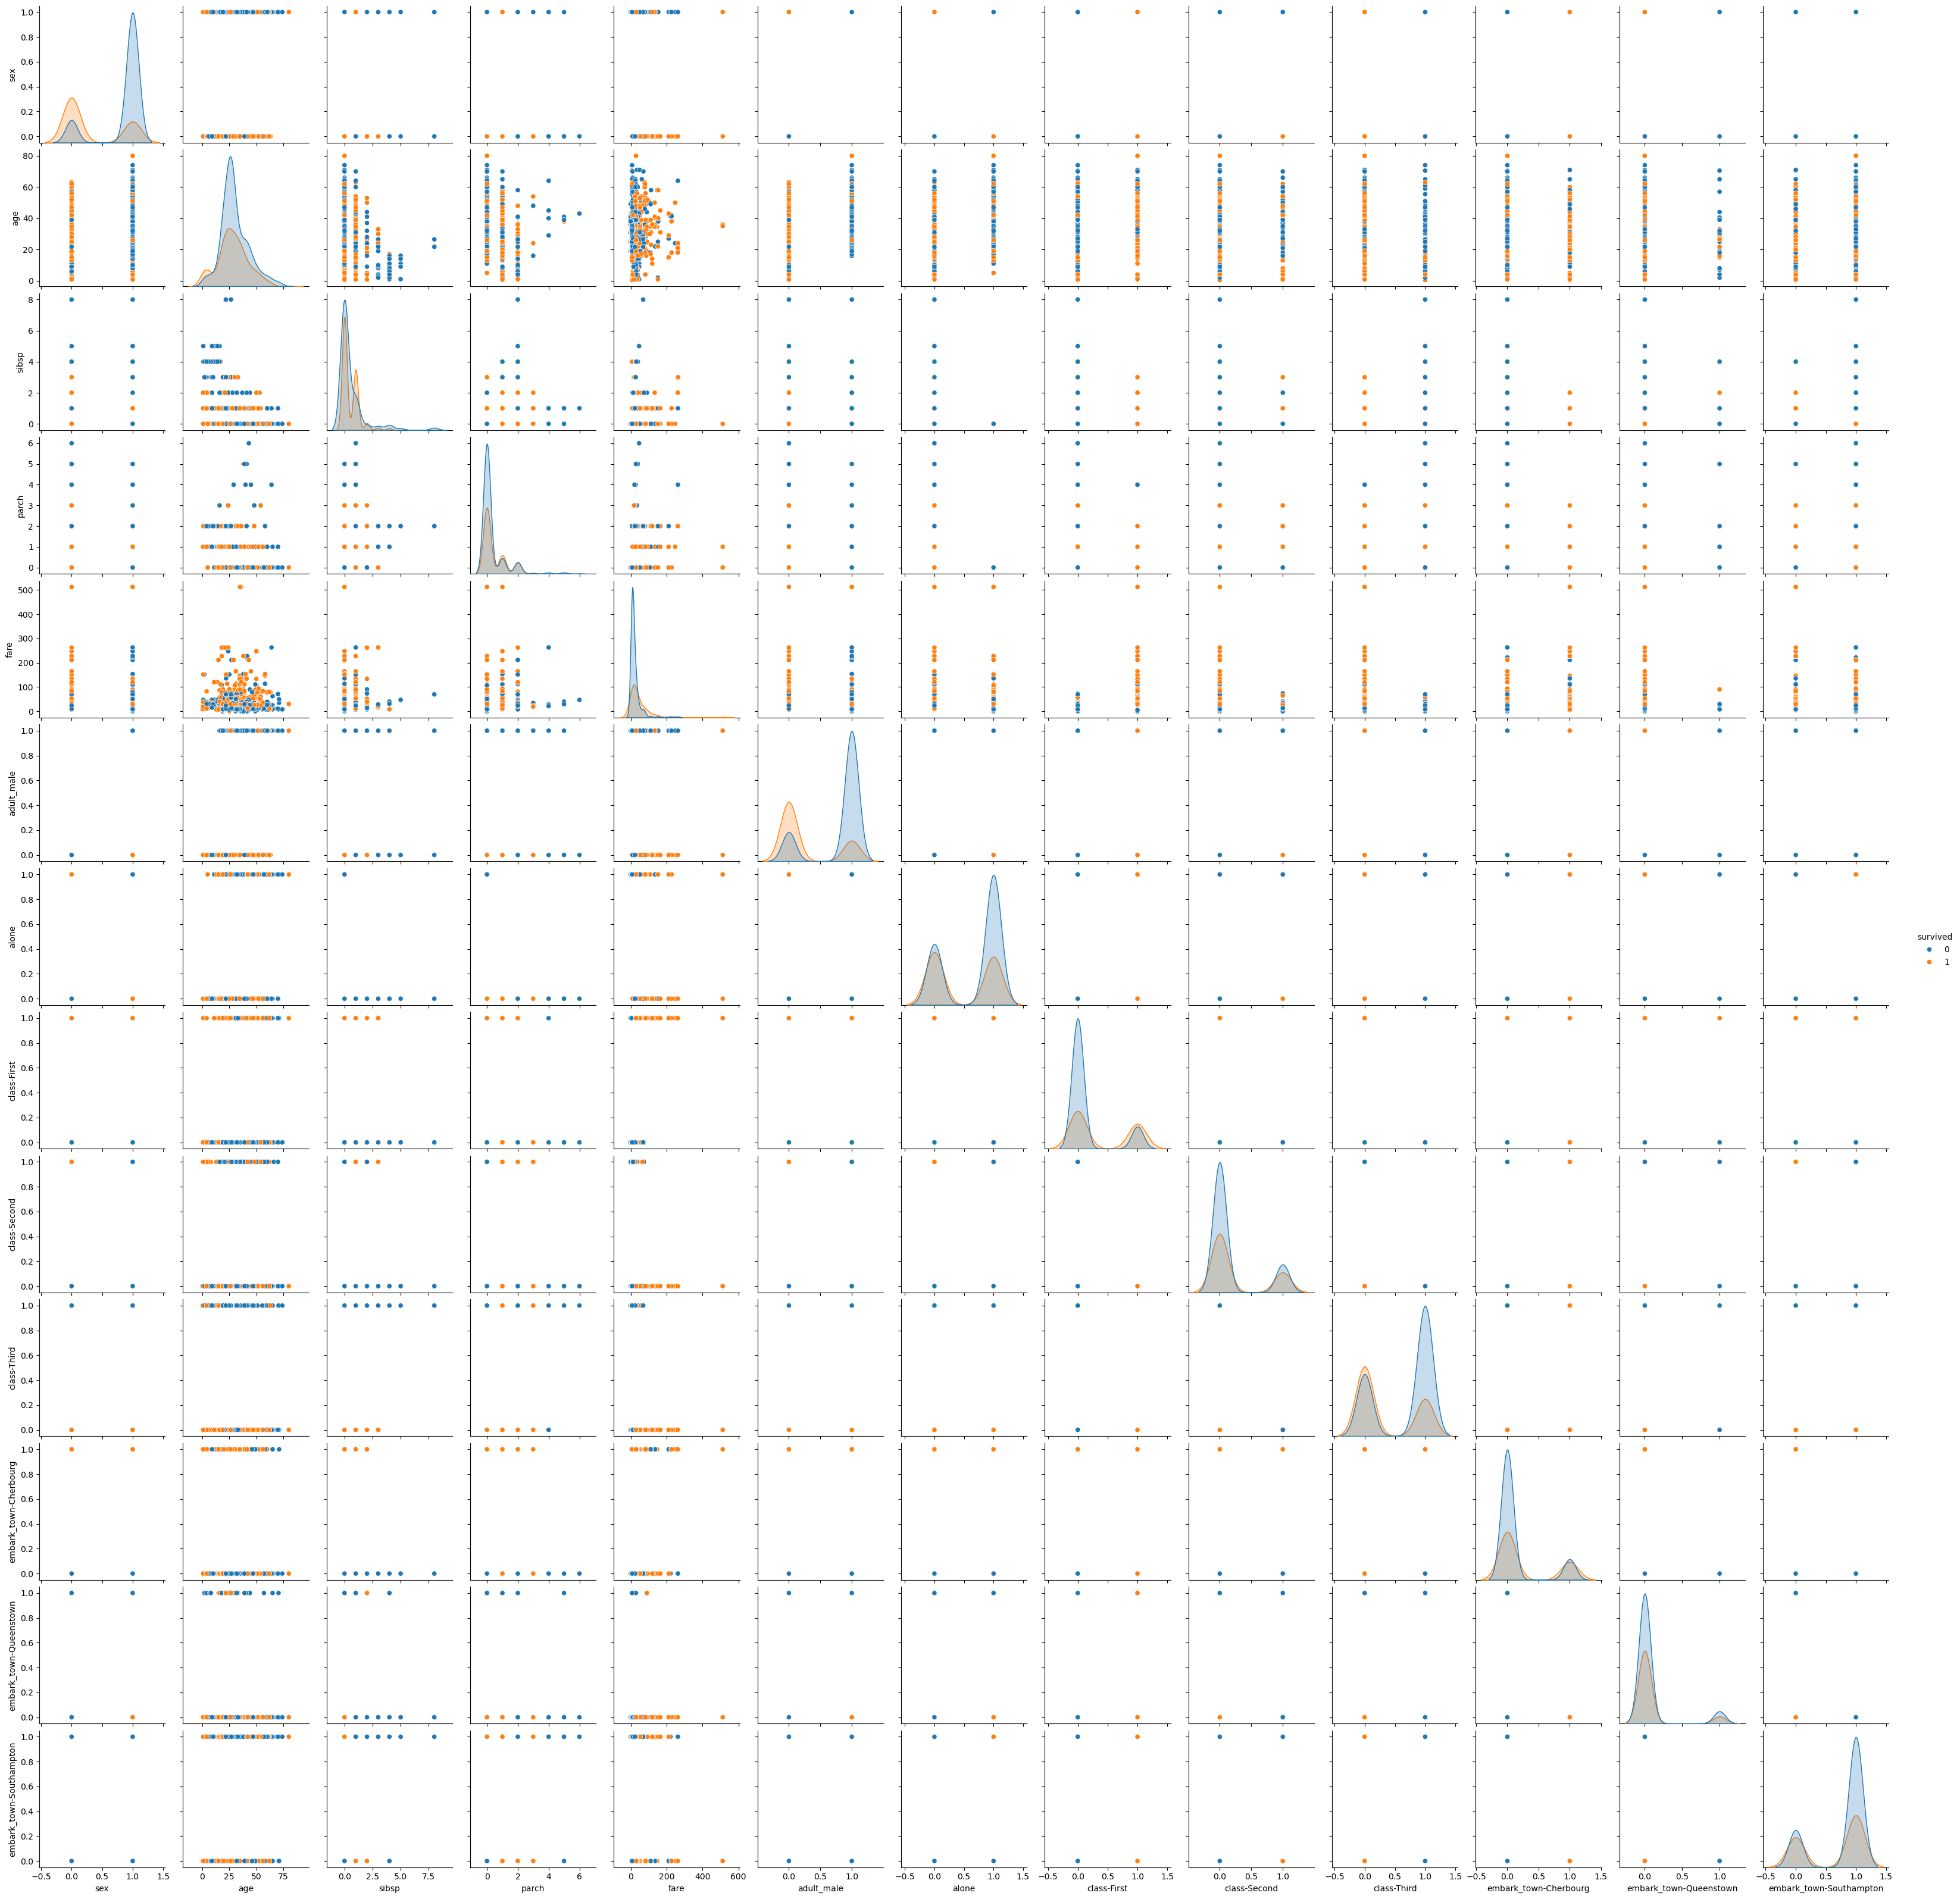

In [57]:
sns.pairplot(data=X, hue='survived')
plt.show()

In [58]:
# definimos la variable a predecir
y = X.pop("survived")
print('Tamaño X',X.shape)
print('Tamaño y',y.shape)

Tamaño X (891, 13)
Tamaño y (891,)


In [59]:
# SEPARAMOS DATASET EN CJTO ENTRENAMIENTO Y TEST 75/25,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

criterio='entropy'
# criterio='gini'
arbol=DecisionTreeClassifier(criterion=criterio, random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

[0.01224088 0.19803566 0.01949595 0.0183786  0.29998082 0.26157938
 0.01923198 0.02899504 0.00516261 0.10874618 0.01755904 0.01059385
 0.        ]


<Axes: ylabel='None'>

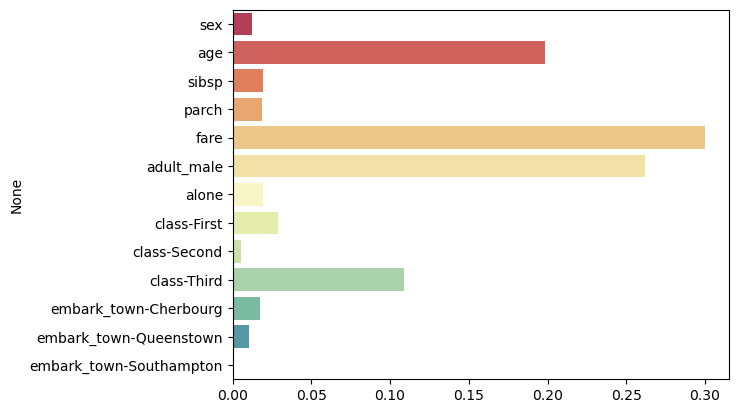

In [60]:
#%%    VEMOS QUÉ VARIABLES PESARON MÁS EN LAS DECISIONES DEL ÁRBOL
fi=arbol.feature_importances_
print(fi)
sns.barplot(y = X_train.columns, x = fi, palette='Spectral')

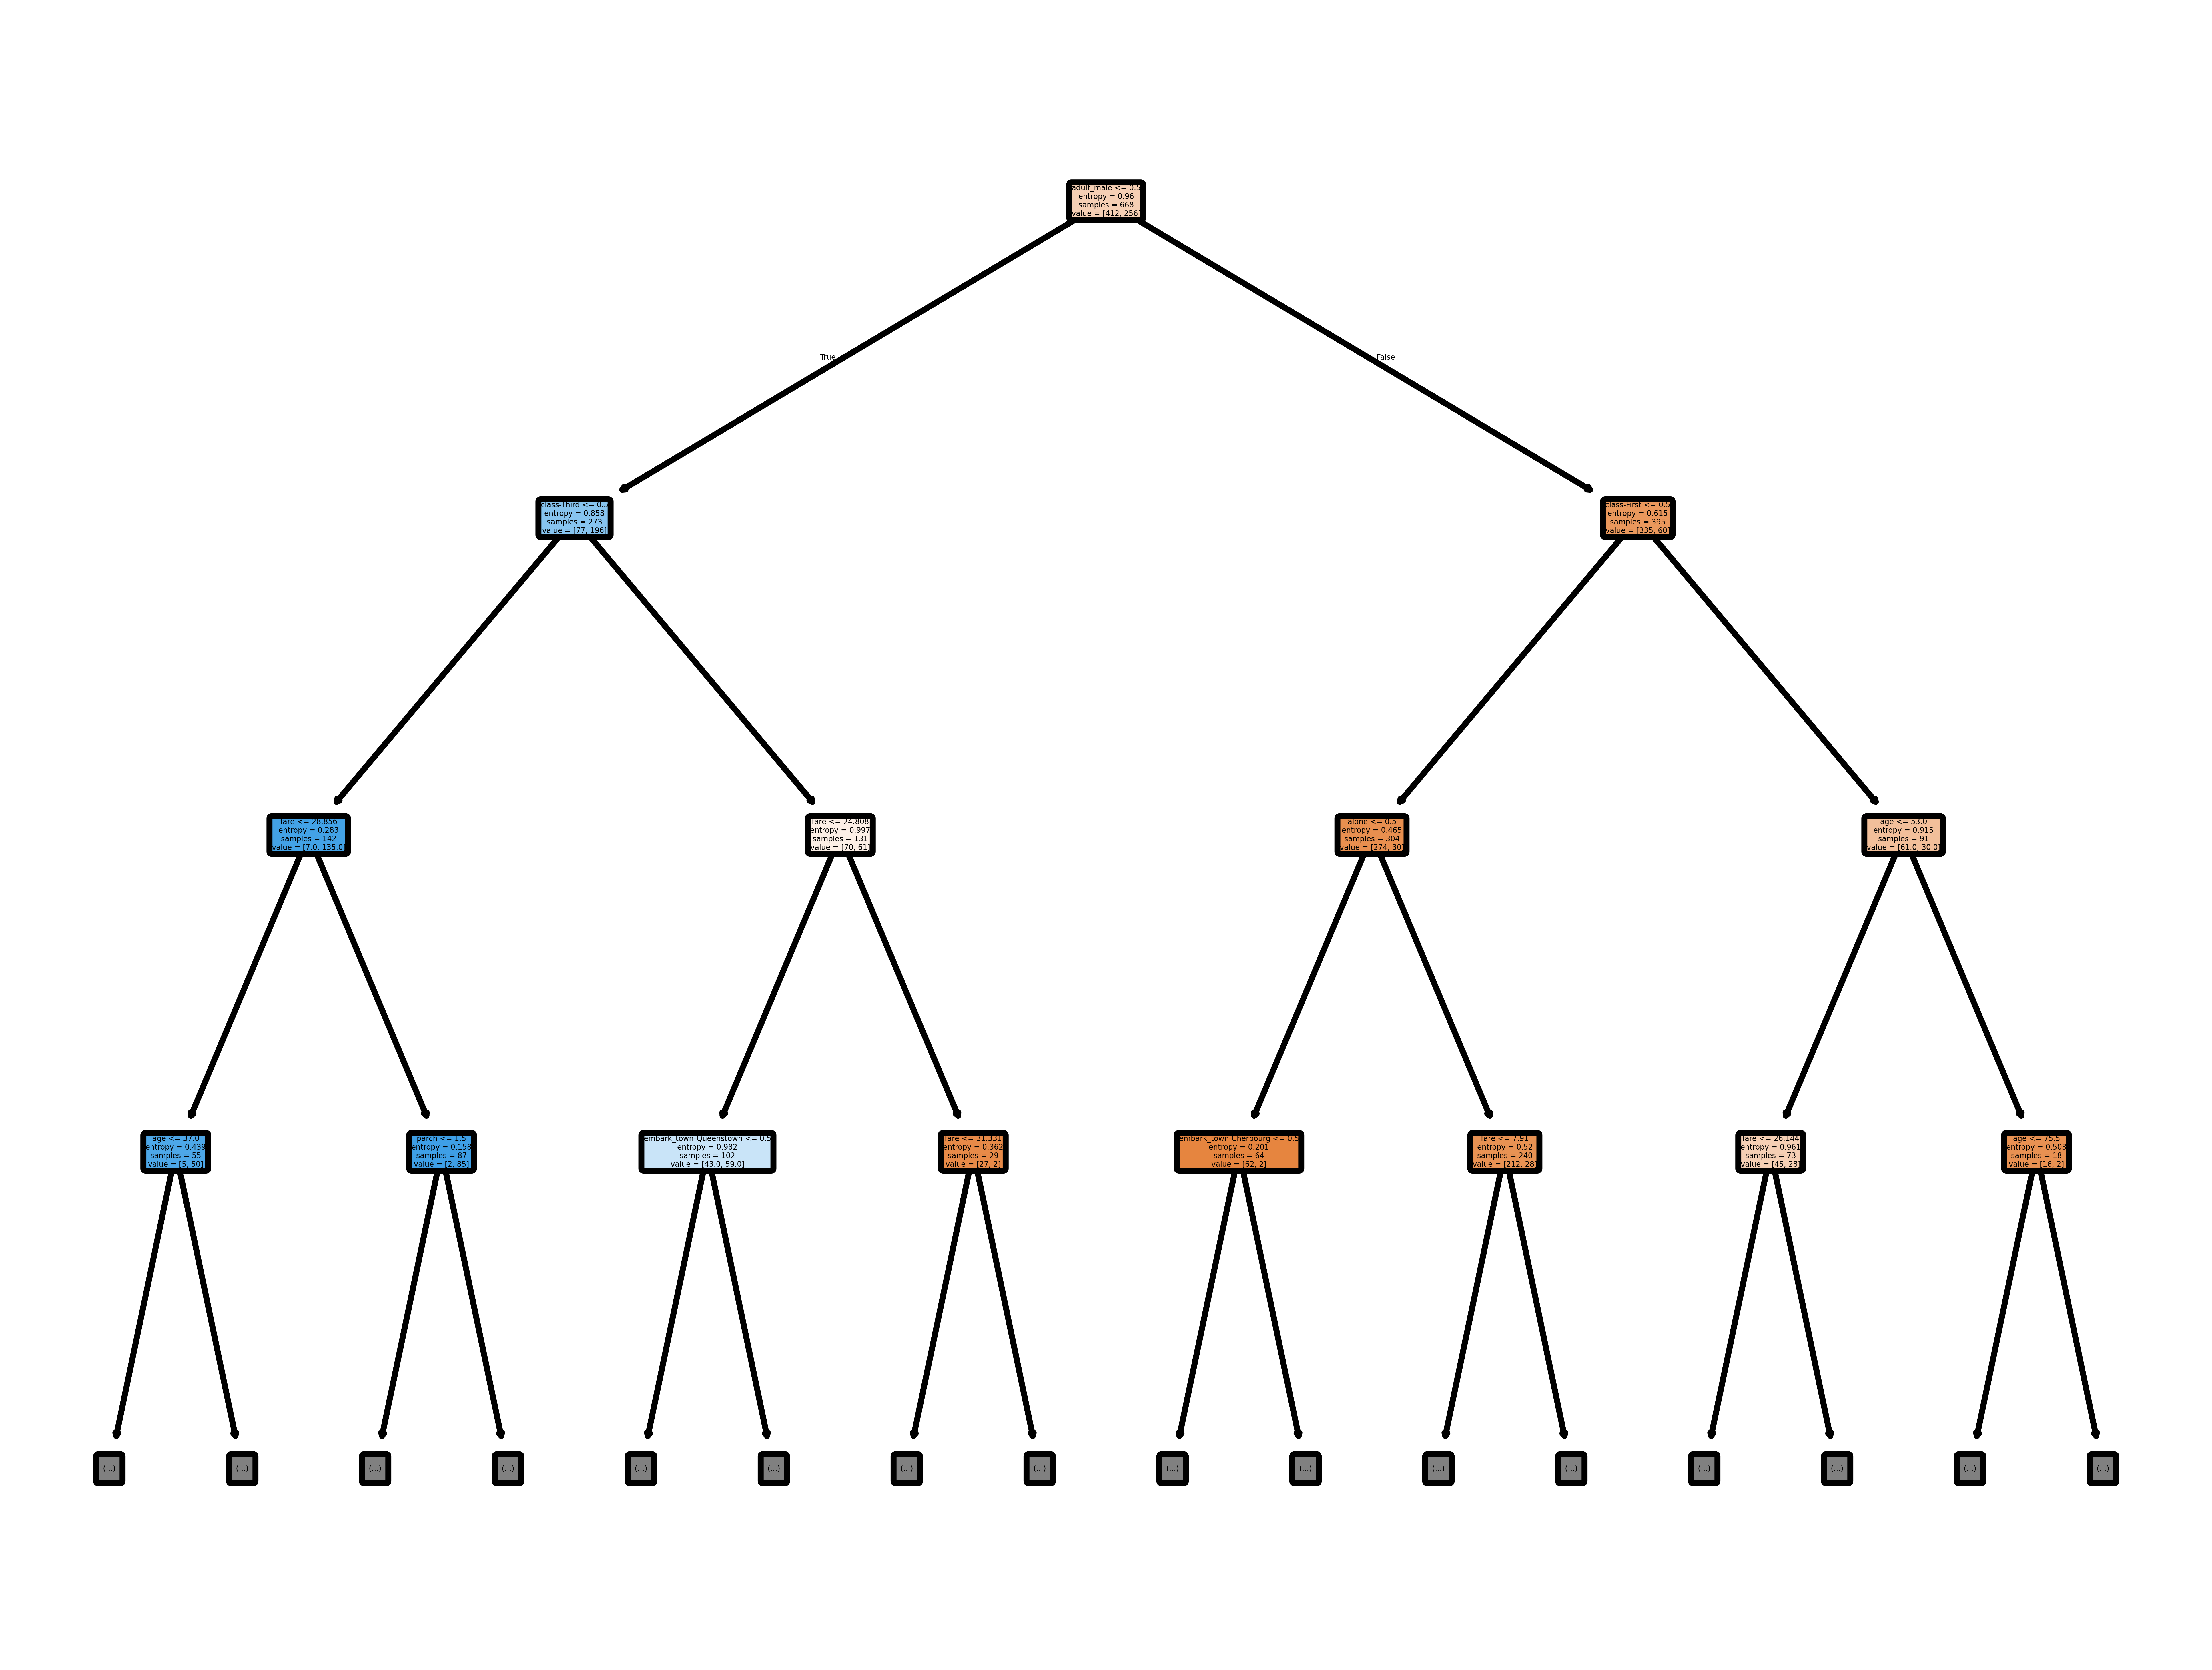

In [61]:
#%%   GRÁFICO DEL ÁRBOL
# plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None,
# label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False,
# precision=3, ax=None, fontsize=None)

list_features=list(X.columns)
plt.figure(dpi=1500)
plot_tree(arbol, filled=True, rounded=True, feature_names=list_features, max_depth=3)
plt.show()
plt.close()

In [62]:
#%%    HACEMOS PREDICCIONES Y VEMOS SCORE
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))

# Se ve claramente que el árbol está sobrejustando

Score train:  0.9925149700598802
Score test:   0.8071748878923767


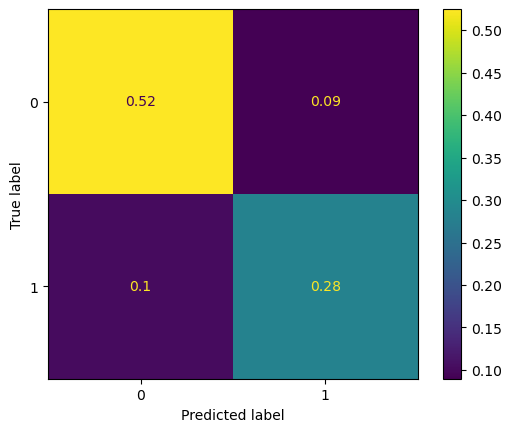

In [63]:
#%%    MATRIZ DE CONFUSION PARA VER MEJOR EL RENDIMIENTO DEL MODELO
cm = confusion_matrix(y_test, y_pred, normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [64]:
list_features

['sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'adult_male',
 'alone',
 'class-First',
 'class-Second',
 'class-Third',
 'embark_town-Cherbourg',
 'embark_town-Queenstown',
 'embark_town-Southampton']

In [65]:
# 🎬 Titanic: probemos con Leo y Rose

# 📌 Paso 1: Definimos las variables que usa el árbol
# features = ['sex', 'age', 'sibsp', 'parch','fare', 'adult_male', 'alone',
#             'class-First','class-Second','class-Third',
#             'embark_town-Cherbourg','embark_town-Queenstown','embark_town-Southampton']

# 👨 Leo (Jack Dawson en la peli)
# - Hombre (sex=1)
# - 23 años
# - Sin hermanos/pareja a bordo (sibsp=0, parch=0)
# - Sin dinero (fare=0.0)
# - Adulto masculino
# - No viajaba solo (alone=0, iba con Rose ❤️)
# - Clase: Tercera
# - Puerto de embarque: Southampton
leo = {
    'sex': [1], 'age': [23], 'sibsp': [0], 'parch': [0], 'fare': [0.0],
    'adult_male': [1], 'alone': [0],
    'class-First': [0], 'class-Second': [0], 'class-Third': [1],
    'embark_town-Cherbourg': [0], 'embark_town-Queenstown': [0], 'embark_town-Southampton': [1]
}
leo1 = pd.DataFrame.from_dict(leo)
print("❄️ Leo sobrevivió, Árbol? →", arbol.predict(leo1))

# 👩 Rose (Rose DeWitt Bukater en la peli)
# - Mujer (sex=0)
# - 23 años
# - Viajaba con madre (parch=1)
# - Tenía un ticket caro (fare=70)
# - No es adulto masculino
# - No viajaba sola (alone=0)
# - Clase: Primera
# - Puerto de embarque: Southampton
ros = {
    'sex': [0], 'age': [23], 'sibsp': [0], 'parch': [1], 'fare': [70.0],
    'adult_male': [0], 'alone': [0],
    'class-First': [1], 'class-Second': [0], 'class-Third': [0],
    'embark_town-Cherbourg': [0], 'embark_town-Queenstown': [0], 'embark_town-Southampton': [1]
}
rose = pd.DataFrame.from_dict(ros)
print("🌹 Rose sobrevivió, Árbol? →", arbol.predict(rose))


❄️ Leo sobrevivió, Árbol? → [0]
🌹 Rose sobrevivió, Árbol? → [1]


In [66]:
# 🌳 A ver qué podemos hacer para combatir el sobreajuste...
# Estrategias comunes:
# 1. Limitar la profundidad máxima del árbol (max_depth)
# 2. Fijar un mínimo de muestras por hoja (min_samples_leaf)
# 3. Podar el árbol (post-pruning con ccp_alpha)

# 📌 Paso 1: Veamos qué tan complejo es nuestro árbol entrenado
print(f"Máxima profundidad del árbol: {arbol.get_depth()}")    # Ejemplo → 20
print(f"Cantidad de hojas: {arbol.get_n_leaves()}")            # Ejemplo → 153

# 📌 Paso 2: Creamos una lista de profundidades a probar (de 1 a 20)
depth = [i + 1 for i in range(20)]

# Vectores para guardar los resultados
scor_train = []   # precisión en entrenamiento
scor_test = []    # precisión en test

# 📌 Paso 3: Entrenamos árboles con distintas profundidades
for dep in depth:
    tree = DecisionTreeClassifier(
        criterion=criterio,  # criterio de división (ej. "gini" o "entropy")
        max_depth=dep,       # fijamos la profundidad máxima
        random_state=16
    )
    tree.fit(X_train, y_train)         # entrenamos
    pred = tree.predict(X_test)        # predicciones en test

    # Guardamos las métricas
    scor_train.append(tree.score(X_train, y_train))  # desempeño en entrenamiento
    scor_test.append(tree.score(X_test, y_test))    # desempeño en test


Máxima profundidad del árbol: 20
Cantidad de hojas: 153


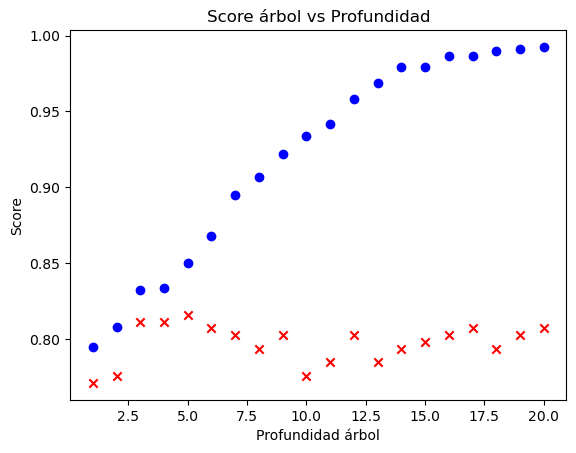

In [67]:
plt.figure()
plt.scatter(x=depth, y=scor_train, marker='o', color='blue')
plt.scatter(x=depth, y=scor_test, marker='x', color='red')
plt.title('Score árbol vs Profundidad')
plt.xlabel('Profundidad árbol')
plt.ylabel('Score')
plt.show()
plt.close()

In [68]:
# 🌳 Estrategia 2 para combatir el sobreajuste:
# Regular la cantidad mínima de muestras en cada hoja (min_samples_leaf).
# 👉 Con esto evitamos que el árbol cree hojas muy pequeñas con reglas
# demasiado específicas, que suelen memorizar el dataset (overfitting).

# 📌 Paso 1: Definimos un rango de valores para min_samples_leaf
samplex = [i + 1 for i in range(20)]   # desde 1 hasta 20

# Vectores para guardar resultados
scor_train1 = []   # precisión en entrenamiento
scor_test1  = []   # precisión en test

# 📌 Paso 2: Entrenamos árboles variando min_samples_leaf
for sam in samplex:
    tree = DecisionTreeClassifier(
        criterion=criterio,         # criterio de partición (ej: 'gini' o 'entropy')
        min_samples_leaf=sam,       # mínimo de muestras en cada hoja
        random_state=16
    )
    tree.fit(X_train, y_train)      # entrenamos el árbol
    pred = tree.predict(X_test)     # predicciones sobre test

    # Guardamos precisión
    scor_train1.append(tree.score(X_train, y_train))
    scor_test1.append(tree.score(X_test, y_test))


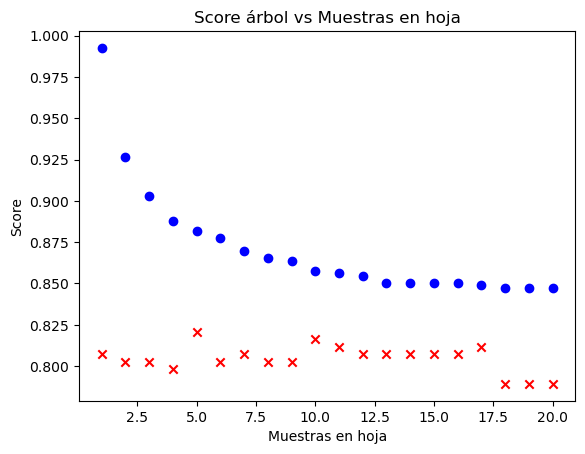

In [69]:
plt.figure()
plt.scatter(x=samplex, y=scor_train1, marker='o', color='blue')
plt.scatter(x=samplex, y=scor_test1, marker='x', color='red')
plt.title('Score árbol vs Muestras en hoja')
plt.xlabel('Muestras en hoja')
plt.ylabel('Score')
plt.show()
plt.close()

Text(0.5, 1.0, 'Impureza total vs Alpha efectivo en el conjunto de entrenamiento')

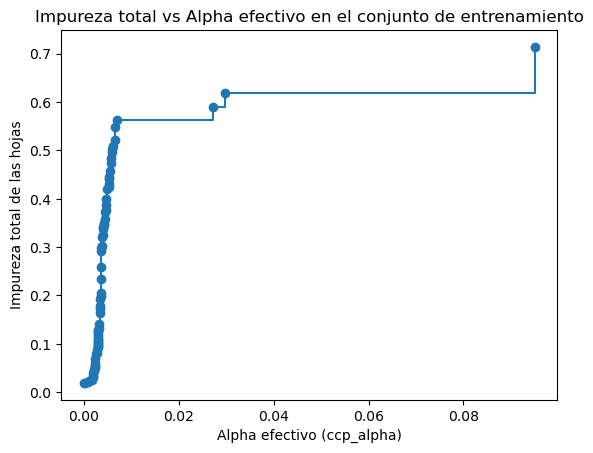

In [70]:
# 🌳 Estrategia 3 para combatir el sobreajuste: Poda posterior (post-pruning)
# Usamos cost_complexity_pruning_path() para calcular los posibles valores de α (ccp_alpha),
# que controlan la poda del árbol. α más alto → árbol más simple.

# 📌 Paso 1: Creamos un árbol sin restricciones
clas = DecisionTreeClassifier(criterion=criterio, random_state=16)

# 📌 Paso 2: Calculamos la "ruta de poda"
# - ccp_alphas: lista de valores de α posibles
# - impurities: impureza total de las hojas para cada α
path = clas.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 📌 Paso 3: Graficamos impureza vs. α
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Alpha efectivo (ccp_alpha)")
ax.set_ylabel("Impureza total de las hojas")
ax.set_title("Impureza total vs Alpha efectivo en el conjunto de entrenamiento")


In [71]:
ccp_alphas

array([0.        , 0.00030959, 0.00093197, 0.00096329, 0.00176263,
       0.00184803, 0.00186394, 0.00199601, 0.00206204, 0.00206204,
       0.00240964, 0.00242898, 0.00242898, 0.00242898, 0.00249681,
       0.00265634, 0.00270183, 0.00291926, 0.00292237, 0.00299401,
       0.00299401, 0.00299401, 0.00299401, 0.00299401, 0.00299401,
       0.00299401, 0.00299401, 0.00302857, 0.00314351, 0.00324234,
       0.00332861, 0.0033665 , 0.00339021, 0.00345368, 0.00351045,
       0.00351574, 0.00351684, 0.00352658, 0.0036386 , 0.00365532,
       0.00372788, 0.00383621, 0.00402688, 0.00402688, 0.00408258,
       0.00412408, 0.00412408, 0.004337  , 0.00444566, 0.00456726,
       0.00458729, 0.00463144, 0.00485951, 0.00521986, 0.00522056,
       0.00525853, 0.00534698, 0.00540365, 0.0056419 , 0.00579686,
       0.00585628, 0.00599118, 0.00606452, 0.00645172, 0.0066141 ,
       0.00700188, 0.02728397, 0.02974862, 0.0950612 , 0.24614293])

In [72]:
impurities

array([0.01930628, 0.01961587, 0.02147981, 0.0234064 , 0.02516903,
       0.03071312, 0.03257706, 0.03856508, 0.04268916, 0.04681325,
       0.04922289, 0.05408084, 0.05893879, 0.0686547 , 0.07864193,
       0.08129828, 0.08670193, 0.09254045, 0.09546282, 0.09845683,
       0.10145084, 0.10444486, 0.10743887, 0.11043288, 0.1164209 ,
       0.12240893, 0.12540294, 0.12843151, 0.13157502, 0.14130203,
       0.1646023 , 0.1713353 , 0.17811573, 0.19193044, 0.19895133,
       0.20598282, 0.23411753, 0.25880361, 0.29155101, 0.29886165,
       0.30258953, 0.32177057, 0.32579745, 0.33787809, 0.34196067,
       0.34608476, 0.35020884, 0.35888284, 0.37221981, 0.37678706,
       0.38596165, 0.39985598, 0.41929403, 0.42451389, 0.42973445,
       0.44025151, 0.44559849, 0.4564058 , 0.4733315 , 0.48492521,
       0.49663778, 0.50262896, 0.50869349, 0.52159692, 0.54805331,
       0.56205707, 0.58934104, 0.61908966, 0.71415086, 0.96029379])

In [75]:
# 🌳 Entrenamos una lista de árboles, cada uno con un valor distinto de ccp_alpha
# Recordemos: ccp_alpha controla la poda → cuanto mayor, más simple el árbol.

clfs = []  # lista donde guardaremos los árboles
for ccp_alpha in ccp_alphas:
    # 📌 Creamos un árbol con un valor específico de alpha
    clf = DecisionTreeClassifier(
        criterion=criterio,       # criterio de impureza (ej: "gini" o "entropy")
        random_state=16,
        ccp_alpha=ccp_alpha       # parámetro de complejidad (poda)
    )
    # 📌 Entrenamos el árbol con los datos de entrenamiento
    clf.fit(X_train, y_train)
    
    # Guardamos el árbol entrenado en la lista
    clfs.append(clf)

# 📌 Revisamos el último árbol entrenado
print(
    f"Número de nodos en el último árbol: {clfs[-1].tree_.node_count}, con ccp_alpha={ccp_alphas[-1]}"
)


Número de nodos en el último árbol: 3, con ccp_alpha=0.0950611991822003


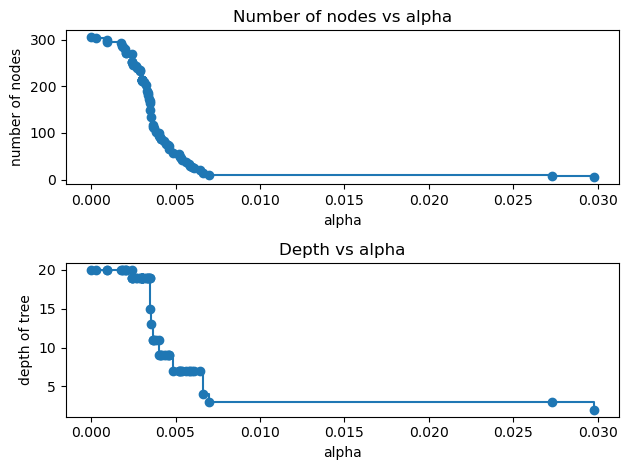

In [76]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


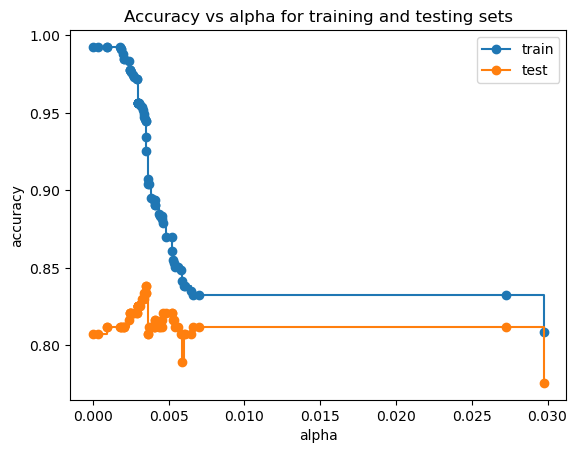

In [77]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# 📌 Convertimos a arrays las listas de scores
alfas = ccp_alphas               # lista de valores de alpha probados
scor = np.array(test_scores)     # accuracy en test para cada alpha
tscor = np.array(train_scores)   # accuracy en train para cada alpha

# 📌 Calculamos la diferencia entre train y test
# 👉 Un modelo balanceado debería tener poca diferencia entre ambos.
dif = tscor - scor

# 📌 Armamos un DataFrame para analizar los resultados
alfa_score = pd.DataFrame({
    'alpha': alfas,
    'score': scor,   # accuracy en test
    'tscor': tscor,  # accuracy en train
    'dif': dif       # diferencia train - test
})

# 📌 Identificamos el mejor alpha
# - idxmin() busca el índice donde la diferencia (dif) es mínima
indice = alfa_score['dif'].idxmin()
alfa_best = alfa_score['alpha'].iloc[indice]

print("🌟 Mejor alpha encontrado:", alfa_best)

# 📌 Mostramos los primeros 15 resultados para análisis
alfa_score.head(15)


Mejor alfa 0.006614098893799138


,alpha,score,tscor,dif
0,0.000000,0.807175,0.992515,0.185340
1,0.000310,0.807175,0.992515,0.185340
2,0.000932,0.811659,0.992515,0.180856
3,0.000963,0.811659,0.992515,0.180856
4,0.001763,0.811659,0.992515,0.180856
5,0.001848,0.811659,0.991018,0.179359
6,0.001864,0.811659,0.991018,0.179359
7,0.001996,0.811659,0.988024,0.176365
8,0.002062,0.811659,0.985030,0.173371
9,0.002062,0.811659,0.985030,0.173371


In [ ]:
# 🌳 Selección del mejor valor de alpha (ccp_alpha) para poda posterior

# 📌 Paso 1: Convertimos las métricas a arrays de NumPy
alfas = ccp_alphas
sco   = np.array(test_scores)   # accuracy en test
score = np.array(train_scores)  # accuracy en train

# 📌 Paso 2: Construimos un DataFrame con los resultados
alfa_scores = pd.DataFrame({
    'alpha': alfas,
    'score_test': sco,
    'score_train': score
})

# 📌 Paso 3: Calculamos la diferencia entre train y test
alfa_scores['diferencia'] = alfa_scores['score_train'] - alfa_scores['score_test']

# 📌 Paso 4: Buscamos el alpha con la diferencia mínima (mejor equilibrio)
index = alfa_scores['diferencia'].idxmin()
alfa_best = alfa_scores['alpha'].iloc[index]

print("🌟 Mejor alpha encontrado:", alfa_best)

# 📌 Paso 5: Mostramos la tabla con los resultados
alfa_scores


Mejor alfa 0.006614098893799138


,alpha,score_test,score_train,diferencia
0,0.000000,0.807175,0.992515,0.185340
1,0.000310,0.807175,0.992515,0.185340
2,0.000932,0.811659,0.992515,0.180856
3,0.000963,0.811659,0.992515,0.180856
4,0.001763,0.811659,0.992515,0.180856
...,...,...,...,...
64,0.006614,0.811659,0.832335,0.020676
65,0.007002,0.811659,0.832335,0.020676
66,0.027284,0.811659,0.832335,0.020676
67,0.029749,0.775785,0.808383,0.032598


Score train:  0.8323353293413174
Score test:   0.8116591928251121


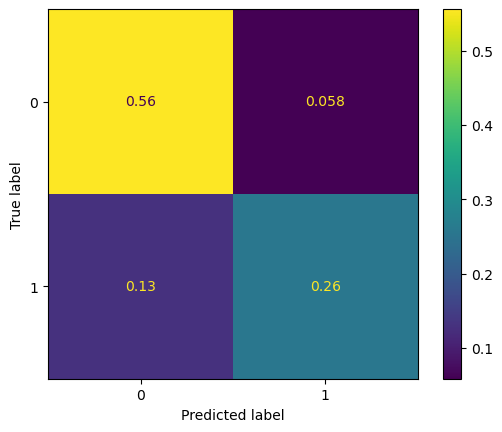

In [44]:
# veamos cómo se porta con el mejor valor de alfa que encontramos, la profundidad y las muestras x hoja
arbol_alfa=DecisionTreeClassifier(criterion=criterio, random_state = 16, ccp_alpha=alfa_best) #max_depth=5, min_samples_leaf=5)   #,ccp_alpha=alfa_best , class_weight='balanced')
arbol_alfa.fit(X_train, y_train)
y_pred_alfa = arbol_alfa.predict(X_test)
print('Score train: ', arbol_alfa.score(X_train, y_train))
print('Score test:  ', arbol_alfa.score(X_test, y_test))
cm_alfa = confusion_matrix(y_test, y_pred_alfa, normalize='all')
ConfusionMatrixDisplay(cm_alfa).plot()
